# Initial Setup

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Image Preprocessing

### Train Image Pre-Processing

In [2]:
train = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Valid Image Pre-Processing

In [3]:
valid = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# Building Model

In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

## Building Convolution Layers

In [5]:
# First Convolution Layer
# filters mean we get 32 different convolution layer
# kernel size means the input I for its calculation is a 3x3 matrix
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))

# The second layer does not have padding parameter so it defaults to valid
# Which means the output has a different size of the input
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Second Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [7]:
# Third Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [8]:
# Fourth Convolution Layer
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
# Fourth Convolution Layer
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
# Fifth Convolution Layer
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# This should be padding=valid but it results in a negative dimension matrix
# The reason for padding=valid because it's to consistently reduce/increase the paramaters
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

## Fully Connected (FC) Layer

In [11]:
model.add(Flatten())

# Here the hidden layer is the main neuron parameter that can be changed
model.add(Dense(units=1500, activation='relu'))

In [12]:
# This drops the neurons produced by the hidden layers
# Drop 25% of it
model.add(Dropout(0.25))

## Output Layer

In [13]:
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [14]:
# Using the default adam optimizer will increase the loss instead of decreasing it
# We are manually changing the default learning rate to be 0.0001
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
  loss='categorical_crossentropy', metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │         769,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,718,922 (25.63 MB)

 Trainable params: 6,718,922 (25.63 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [16]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 70ms/step - accuracy: 0.4027 - loss: 2.0670 - val_accuracy: 0.8199 - val_loss: 0.5775
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 68s 31ms/step - accuracy: 0.8351 - loss: 0.5189 - val_accuracy: 0.8948 - val_loss: 0.3356
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 68s 31ms/step - accuracy: 0.8995 - loss: 0.3046 - val_accuracy: 0.9170 - val_loss: 0.2590
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - accuracy: 0.9337 - loss: 0.2016 - val_accuracy: 0.8865 - val_loss: 0.3771
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - accuracy: 0.9478 - loss: 0.1572 - val_accuracy: 0.9235 - val_loss: 0.2455
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - accuracy: 0.9597 - loss: 0.1258 - val_accuracy: 0.9301 - val_loss: 0.2274
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - accuracy: 0.9675 - loss: 0.1001 - val_accuracy: 0.9578 - val_loss: 0.1493
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - accuracy: 0.9747 

## Model Evaluation

In [17]:
train_loss, train_acc = model.evaluate(training_set)

print(train_loss, train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.9856 - loss: 0.0452
0.04313904792070389 0.9864428639411926


In [18]:
val_loss, val_acc = model.evaluate(validation_set)

print(val_loss, val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9591 - loss: 0.1415
0.1482316553592682 0.958172082901001


## Saving Model

In [19]:
model.save('trained_model.keras')

In [20]:
import json
with open('training_hist.json', "w") as f:
  json.dump(training_history.history, f)

# Accuracy Visualization

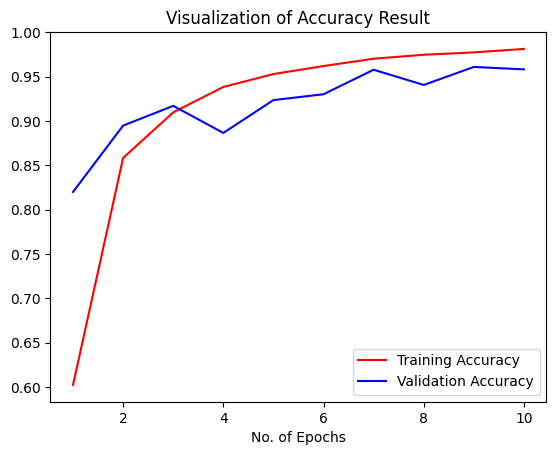

In [21]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Other Metrics for Evaluation

In [22]:
class_name = validation_set.class_names

In [23]:
# The reason we are not using the test folder is because within the test directory
# the files are not in folders and categorized based on class,
# instead we are using the valid folder to create the test set
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [25]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step


In [26]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

# Precision Recall F-score
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.97      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.95      0.96       440
                                   Apple___healthy       0.97      0.92      0.95       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.84      0.89       410
                       Corn_(maize)___Common_rust_       0.98      0.98      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

## Heatmap

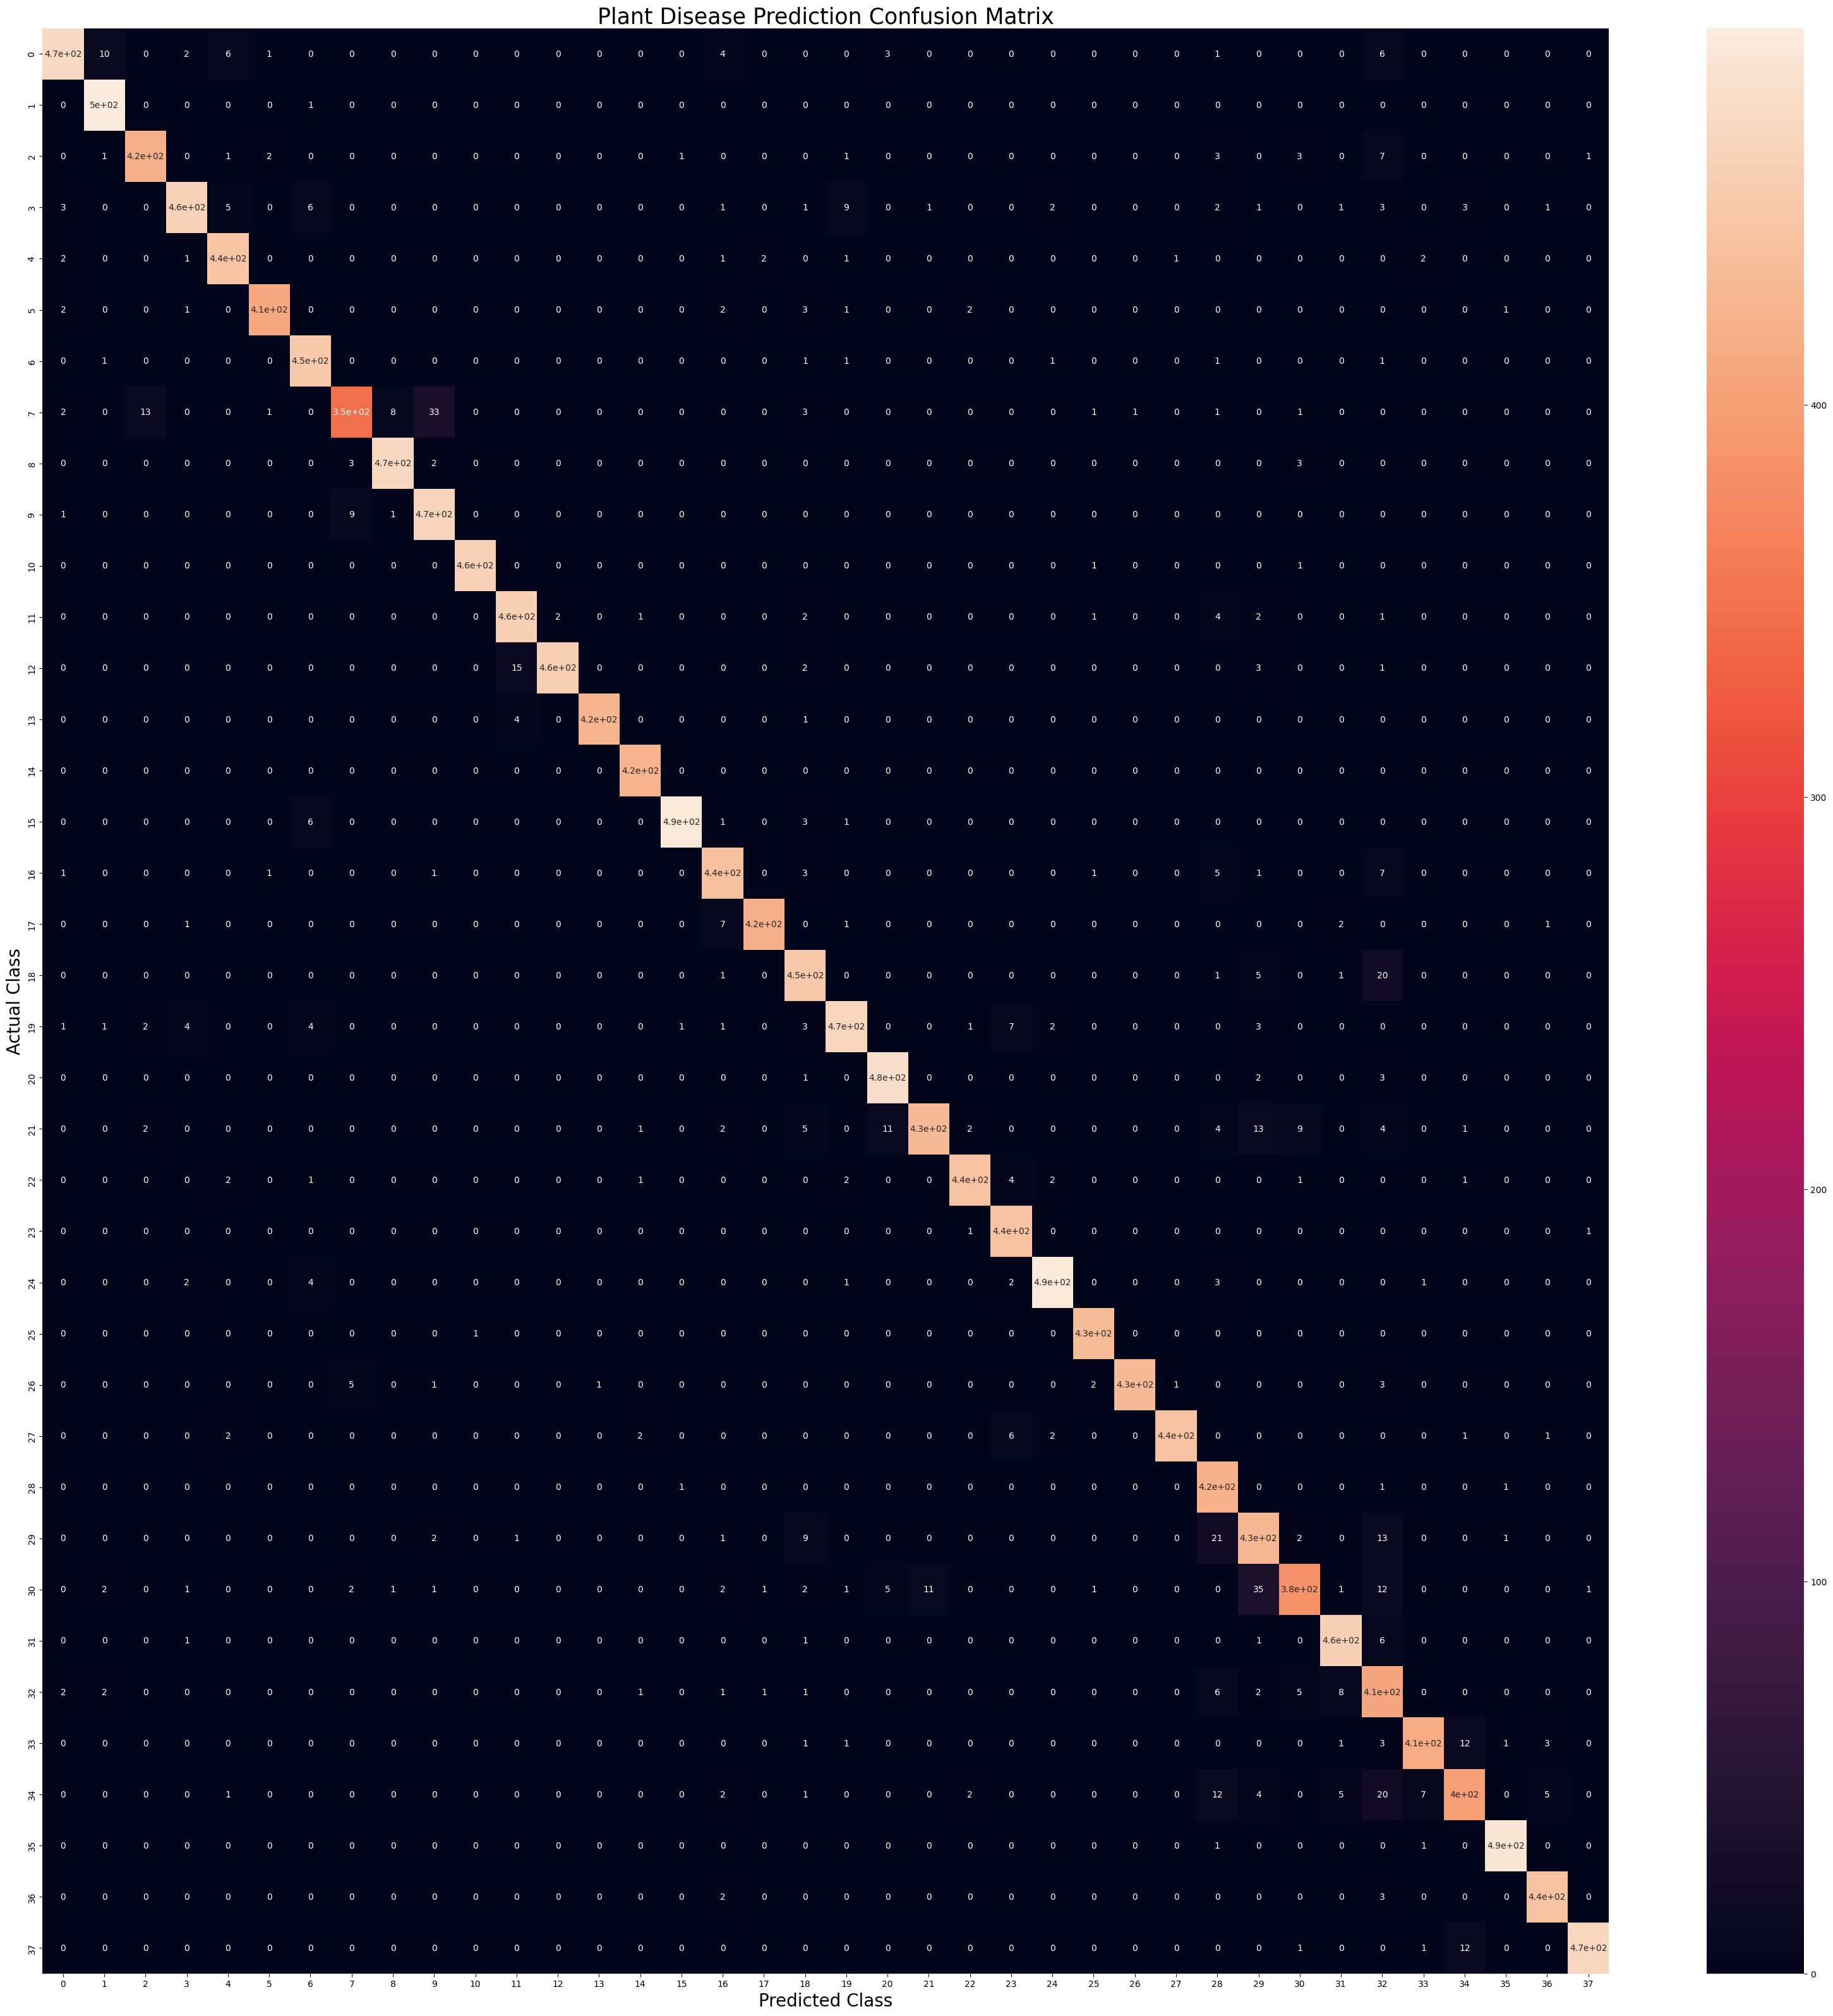

In [28]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()